In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

In [2]:
n_features = 200
xs = np.linspace(-5, 5, n_features)
ys = np.sin(xs) + (np.random.random(n_features) - 0.5)
print(xs.shape, ys.shape)

(200,) (200,)


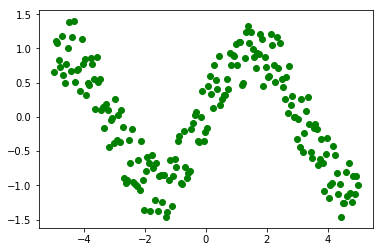

In [3]:
plt.figure()
axis = plt.subplot()
plt.scatter(xs, ys, color='green')
plt.show()

In [7]:
n_neurons = 20;

# reset graph
tf.reset_default_graph()

X = tf.placeholder(dtype=tf.float32, shape=[None, 1], name='X')
Y = tf.placeholder(dtype=tf.float32, shape=[None, 1], name='Y')

W = tf.get_variable(
    name='W',
    shape=[1, n_neurons],
    dtype=tf.float32,
    initializer=tf.random_normal_initializer())

b = tf.get_variable(
    name='b',
    shape=[n_neurons],
    dtype=tf.float32,
    initializer=tf.constant_initializer(0))

# h = tf.nn.tanh(tf.nn.bias_add(tf.matmul(tf.expand_dims(X, 1), W), b))
# h = tf.nn.tanh(tf.expand_dims(X, 1) * W + b)
h = tf.nn.tanh(X * W + b)

Y_predict = tf.reduce_sum(h, 1)

print(W.shape)
print(b.shape)
print(Y_predict.shape)

(1, 20)
(20,)
(?,)


在試了很多組合之後，我覺得最理想的就是要在把資料 feed 進去就變成 `[batch, ...]` 的 `shape`

In [5]:
xs = np.expand_dims(xs, 1)
ys = np.expand_dims(ys, 1)

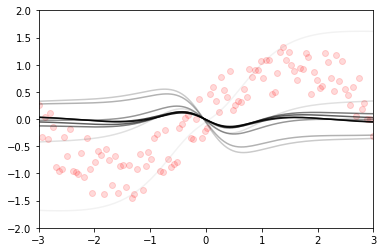

In [24]:
n_iterations = 100

loss = tf.squared_difference(Y, Y_predict)
cost = tf.reduce_mean(loss)
optimizer = tf.train.AdamOptimizer(0.01).minimize(cost)

prev_cost = 0

fig, ax = plt.subplots(1, 1)
ax.scatter(xs, ys, alpha=0.15, color='red')
ax.set_xlim([-3, 3])
ax.set_ylim([-2, 2])

with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    
    for i_iterate in range(n_iterations):
        sess.run(optimizer, feed_dict={X: xs, Y: ys})
        prev_cost = sess.run(cost, feed_dict={X: xs, Y: ys})
        # print('cost: {}'.format(prev_cost))
        if i_iterate % 10 == 0:
            ys_pred = Y_predict.eval(feed_dict={X: xs}, session=sess)
            form = 'k-'
            ax.plot(xs, ys_pred, form,alpha=(i_iterate / n_iterations)**1.3)
    
    plt.draw()